In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
filepath = "/content/drive/MyDrive/Educayshion/Colabs/Projects/IMDb Movies/movies.csv"
movies = pd.read_csv(filepath)

In [3]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Data Cleaning

### Missing Values

In [5]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

There are several columns with missing values, so let's take a deeper look to see if we should remove them or impute them with something.

There are several columns where we have no basis on which we can use imputation. We will drop rows with NaN values in these columns: `rating`, `released`, `writer`, `star`, `country`, `company`.

In [6]:
movies.dropna(axis=0, how='any', subset=['rating', 'released', 'writer', 'star', 'country', 'company'], inplace=True)
movies.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          1
votes          1
director       0
writer         0
star           0
country        0
budget      2101
gross        163
company        0
runtime        1
dtype: int64

For the other columns with missing values, let's take a look at their distribution.

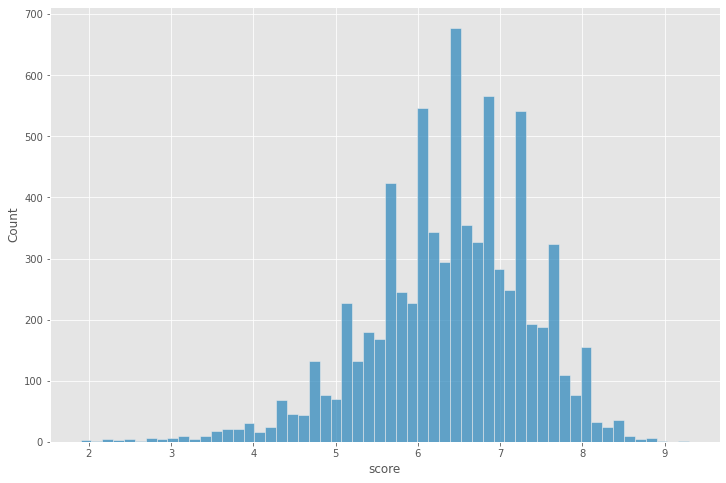

In [7]:
sns.histplot(movies['score'])

Let's impute the missing `score` value using the mean, since the distribution looks somewhat normal.

In [8]:
movies.loc[movies['score'].isnull(), 'score'] = movies['score'].mean()

In [9]:
movies['score'].isnull().sum()

0

Now, let's check out `votes`

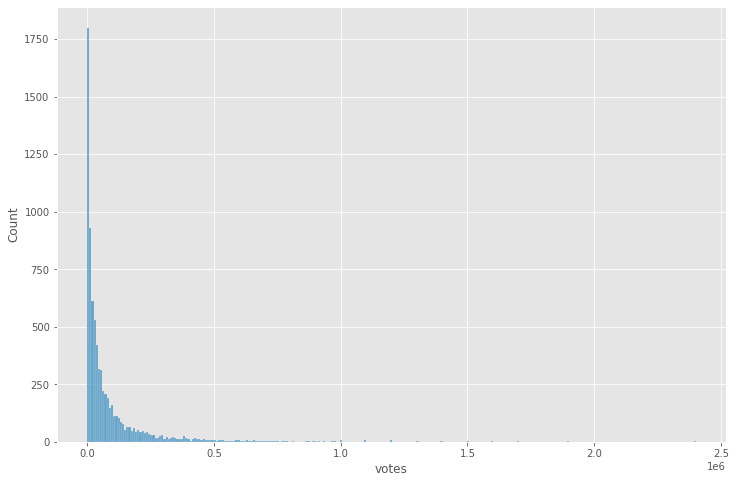

In [10]:
sns.histplot(movies['votes'])

Since the distribution is skewed, let's use the median.

In [11]:
movies.loc[movies['votes'].isnull(), 'votes'] = movies['votes'].median()
movies['votes'].isnull().sum()

0

Now, we look at `runtime`.

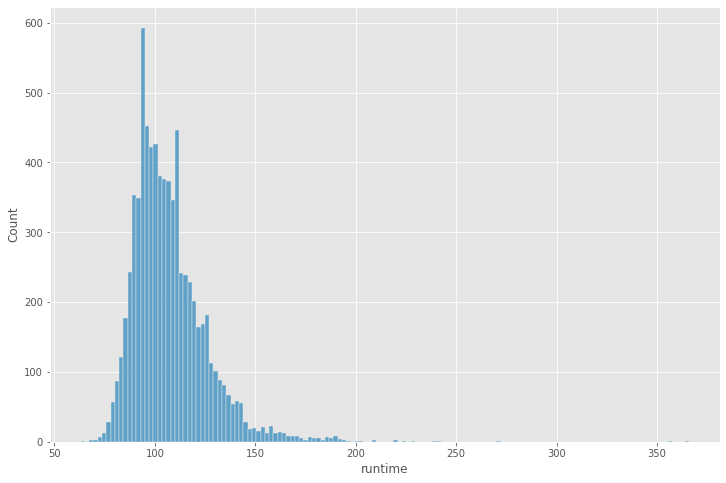

In [12]:
sns.histplot(movies['runtime'])

This time we will impute using the mean, since the distribution is roughly normal.

In [13]:
movies.loc[movies['runtime'].isnull(), 'runtime'] = movies['runtime'].mean()
movies['runtime'].isnull().sum()

0

Next, we look at `budget`.

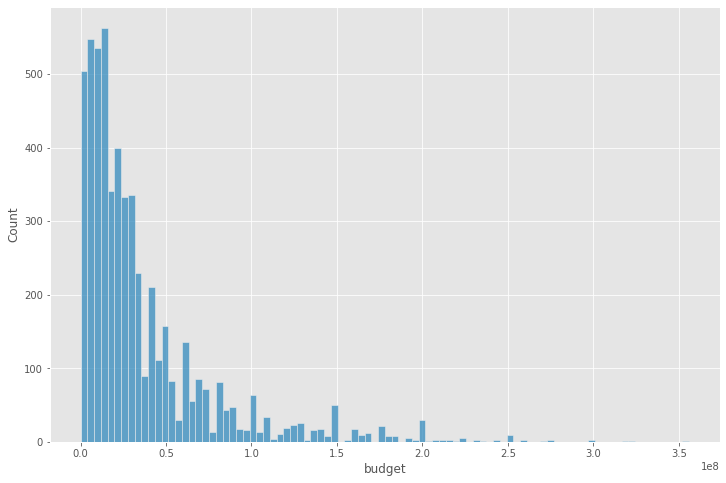

In [14]:
sns.histplot(movies['budget'])

Let's impute `budget` using the median, since the distribution is quite skewed.

In [15]:
from sklearn.impute import SimpleImputer
budget_imp = SimpleImputer(strategy='median')
movies['budget'] = budget_imp.fit_transform(np.array(movies['budget']).reshape(-1,1))
movies['budget'].isnull().sum()

0

Lastly, we look at `gross`.

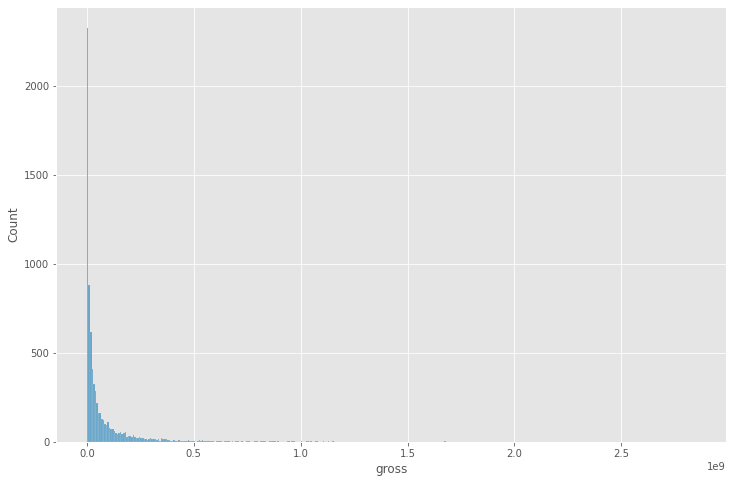

In [16]:
sns.histplot(movies['gross'])

The distribution is here is also heavily skewed, so we will impute using the median again.

In [17]:
gross_imp = SimpleImputer(strategy='median')
movies['gross'] = gross_imp.fit_transform(np.array(movies['gross']).reshape(-1,1))
movies['gross'].isnull().sum()

0

### Check for Duplicates

In [18]:
movies[movies.duplicated(keep=False)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


So we have no duplicates WOOHOO!

### Data Cleaning and Formatting

In [19]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Since `votes`, `budget`, `gross`, `runtime` are of type `float64`, but they are in fact all integer values, let convert those to `int64` instead to save memory and also it just looks better.

In [21]:
movies['votes'] = movies['votes'].astype(np.int64)
movies['budget'] = movies['budget'].astype(np.int64)
movies['gross'] = movies['gross'].astype(np.int64)
movies['runtime'] = movies['runtime'].astype(np.int64)
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [22]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


Next, let's reformat `released` to `datetime`.

In [23]:
released = movies['released']
released.head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [24]:
# we only extract the date and month, since we already have the year
date = released.str.split(',').str[0].str.split().str[1]
month = released.str.split(',').str[0].str.split().str[0]


In [25]:
def convert_month(month):
    dictionary = {'January': 1,
                  'February': 2,
                  'March': 3,
                  'April': 4,
                  'May': 5,
                  'June': 6,
                  'July': 7,
                  'August': 8,
                  'September': 9,
                  'October': 10,
                  'November': 11,
                  'December': 12}
    return dictionary.get(month)


In [26]:
month.apply(convert_month).isnull().sum()

9

Let's investigate which rows lead to these missing months.

In [27]:
movies.loc[month.apply(convert_month).isnull(), 'released']

201     1981 (United States)
312             1982 (Japan)
786            1985 (Taiwan)
800     1985 (United States)
1173    1987 (United States)
1825           1990 (Canada)
2816             1995 (Iran)
4187    2019 (United States)
6413    2013 (United States)
Name: released, dtype: object

Let's convert these to NA then.

In [28]:
date[month.apply(convert_month).isnull()] = np.NaN
month[month.apply(convert_month).isnull()] = np.NaN

In [29]:
movies['date of release'] = date
movies['month of release'] = month

In [30]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date of release,month of release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,13,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,2,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,20,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,25,July


In [31]:
movies.isnull().sum()

name                0
rating              0
genre               0
year                0
released            0
score               0
votes               0
director            0
writer              0
star                0
country             0
budget              0
gross               0
company             0
runtime             0
date of release     9
month of release    9
dtype: int64

Let's drop the rows where the date and month of release are not available.

In [32]:
movies.dropna(axis=0, how='any', subset=['date of release', 'month of release'], inplace=True)
movies.isnull().sum()

name                0
rating              0
genre               0
year                0
released            0
score               0
votes               0
director            0
writer              0
star                0
country             0
budget              0
gross               0
company             0
runtime             0
date of release     0
month of release    0
dtype: int64

In [33]:
movies['month of release'] = movies['month of release'].apply(convert_month)

In [34]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date of release,month of release
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,13,6
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,2,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,20,6
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2,7
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,25,7


In [35]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7567 entries, 0 to 7661
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7567 non-null   object 
 1   rating            7567 non-null   object 
 2   genre             7567 non-null   object 
 3   year              7567 non-null   int64  
 4   released          7567 non-null   object 
 5   score             7567 non-null   float64
 6   votes             7567 non-null   int64  
 7   director          7567 non-null   object 
 8   writer            7567 non-null   object 
 9   star              7567 non-null   object 
 10  country           7567 non-null   object 
 11  budget            7567 non-null   int64  
 12  gross             7567 non-null   int64  
 13  company           7567 non-null   object 
 14  runtime           7567 non-null   int64  
 15  date of release   7567 non-null   object 
 16  month of release  7567 non-null   int64  


In [36]:
movies['month of release'] = movies['month of release'].astype(str)
movies['year'] = movies['year'].astype(str)

In [37]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7567 entries, 0 to 7661
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              7567 non-null   object 
 1   rating            7567 non-null   object 
 2   genre             7567 non-null   object 
 3   year              7567 non-null   object 
 4   released          7567 non-null   object 
 5   score             7567 non-null   float64
 6   votes             7567 non-null   int64  
 7   director          7567 non-null   object 
 8   writer            7567 non-null   object 
 9   star              7567 non-null   object 
 10  country           7567 non-null   object 
 11  budget            7567 non-null   int64  
 12  gross             7567 non-null   int64  
 13  company           7567 non-null   object 
 14  runtime           7567 non-null   int64  
 15  date of release   7567 non-null   object 
 16  month of release  7567 non-null   object 


In [38]:
movies['released'] = movies['date of release'] + '/' + movies['month of release'] + '/' + movies['year']

In [39]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date of release,month of release
0,The Shining,R,Drama,1980,13/6/1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,13,6
1,The Blue Lagoon,R,Adventure,1980,2/7/1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,2,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,20/6/1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,20,6
3,Airplane!,PG,Comedy,1980,2/7/1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,2,7
4,Caddyshack,R,Comedy,1980,25/7/1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,25,7


In [40]:
movies.drop(columns=['year', 'date of release', 'month of release'], inplace=True)
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,13/6/1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,2/7/1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,20/6/1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,2/7/1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,25/7/1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [41]:
movies['released'].str.split('/').str[0].value_counts()

25      358
21      303
19      280
22      277
20      274
18      272
16      262
13      257
17      257
26      256
14      256
12      255
9       253
10      253
11      247
1       241
15      240
24      235
23      229
6       229
3       229
30      224
8       223
7       220
27      218
2       214
28      211
4       208
5       207
29      202
31      131
1991     13
1988      6
1990      4
1994      4
1992      3
1987      3
1986      3
1989      3
1983      2
1982      1
1984      1
1985      1
2010      1
2011      1
Name: released, dtype: int64

There are some impossible values, so we will remove those.

In [42]:
movies['released'].str.split('/').str[0].astype(int) > 1990

0       False
1       False
2       False
3       False
4       False
        ...  
7653    False
7656    False
7658    False
7659    False
7661    False
Name: released, Length: 7567, dtype: bool

In [43]:
movies.drop(movies[movies['released'].str.split('/').str[0].astype(int) > 1980].index, inplace=True)

Now we're ready to convert `released` to `datetime` type.

In [44]:
movies['released'] = pd.to_datetime(movies['released'], infer_datetime_format=True, errors='coerce')

FINALLY DONE WITH THAT!

In [45]:
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [46]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7521 entries, 0 to 7661
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      7521 non-null   object        
 1   rating    7521 non-null   object        
 2   genre     7521 non-null   object        
 3   released  7520 non-null   datetime64[ns]
 4   score     7521 non-null   float64       
 5   votes     7521 non-null   int64         
 6   director  7521 non-null   object        
 7   writer    7521 non-null   object        
 8   star      7521 non-null   object        
 9   country   7521 non-null   object        
 10  budget    7521 non-null   int64         
 11  gross     7521 non-null   int64         
 12  company   7521 non-null   object        
 13  runtime   7521 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 881.4+ KB


In [65]:
movies['released'].dt.year.isnull().sum()

1

There's still one row with a null value for the year, so let's get rid of that.

In [67]:
movies.drop(movies[movies['released'].dt.year.isnull()].index, inplace=True)

We will adjust the `budget` value for inflation, so that it doesn't distort our analysis when we want to, say, study correlation between our features.

In [48]:
!pip install cpi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.5 MB/s 


In [49]:
import cpi # Library to help us adjust for inflation

In [60]:
adjust_for_inflation = np.vectorize(cpi.inflate) # vectorize the function that can calculate inflation-adjusted value

In [69]:
adjusted_budget = adjust_for_inflation(movies['budget'], movies['released'].dt.year)

In [70]:
movies['adjusted_budget'] = adjusted_budget
movies.drop(columns = ['budget'], inplace=True)
movies.columns

Index(['name', 'rating', 'genre', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'gross', 'company', 'runtime',
       'adjusted_budget'],
      dtype='object')

Similary, let's do the same thing for the gross revenue.

In [71]:
movies['adjusted_gross'] = adjust_for_inflation(movies['gross'], movies['released'].dt.year)
movies.drop(columns=['gross'], inplace=True)
movies.columns

Index(['name', 'rating', 'genre', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'company', 'runtime', 'adjusted_budget',
       'adjusted_gross'],
      dtype='object')

## Exploratory Data Analysis

In [73]:
movies.corr() # looking at correlation of the numeric attributes

,score,votes,runtime,adjusted_budget,adjusted_gross
score,1.000000,0.414176,0.401670,0.036631,0.202806
votes,0.414176,1.000000,0.309317,0.419754,0.650290
runtime,0.401670,0.309317,1.000000,0.273930,0.248405
adjusted_budget,0.036631,0.419754,0.273930,1.000000,0.669845
adjusted_gross,0.202806,0.650290,0.248405,0.669845,1.000000


Surprisingly, `adjusted_budget` does not correlate with `score` much at all. `votes`, `runtime`, and `adjusted_gross` all have decent correlation with `score`.

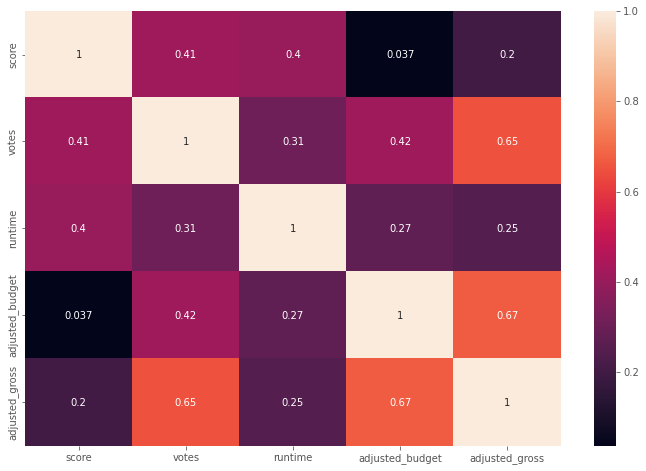

In [75]:
sns.heatmap(movies.corr(), annot=True)

The strongest correlation happens between `adjusted_gross` and `adjusted_budget`, and `adjusted_gross` and `votes`.

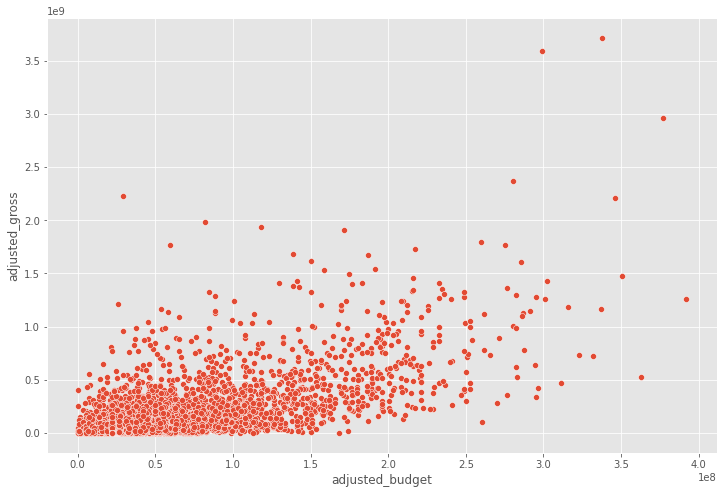

In [83]:
sns.scatterplot(x='adjusted_budget', y='adjusted_gross', data=movies);

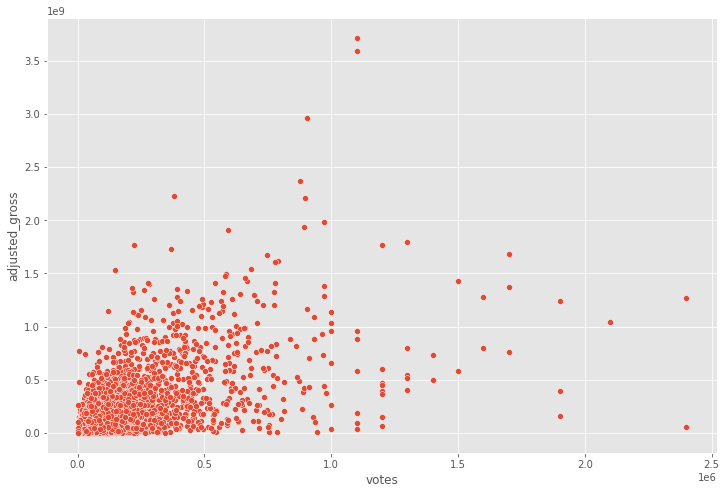

In [84]:
sns.scatterplot(x='votes', y='adjusted_gross', data=movies);

Next, let's examine the relationship between the categorical features and the numeric features.

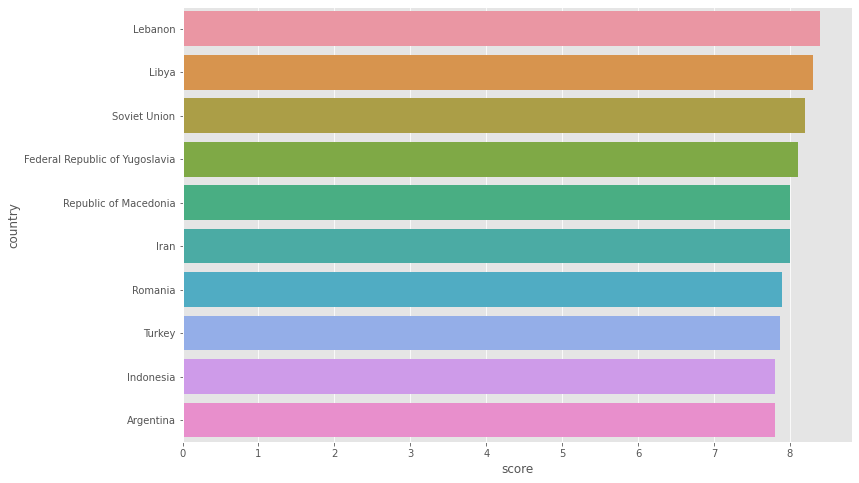

In [97]:
# Plot top 10 countries with the highest mean score
sns.barplot(x=movies.groupby(by='country').mean()['score'].sort_values(ascending=False)[:10],
            y=movies.groupby(by='country').mean()['score'].sort_values(ascending=False).index[:10],
            orient='h')

We can also look at companies who make the most money and get the highest scores for the movies.

In [98]:
movies.groupby(by='company').mean()['score']

company
"DIA" Productions GmbH & Co. KG        6.1
"Weathering With You" Film Partners    7.5
.406 Production                        6.8
1+2 Seisaku Iinkai                     8.2
10 West Studios                        6.4
                                      ... 
i am OTHER                             7.2
i5 Films                               6.6
iDeal Partners Film Fund               7.5
micro_scope                            8.3
thefyzz                                5.7
Name: score, Length: 2315, dtype: float64

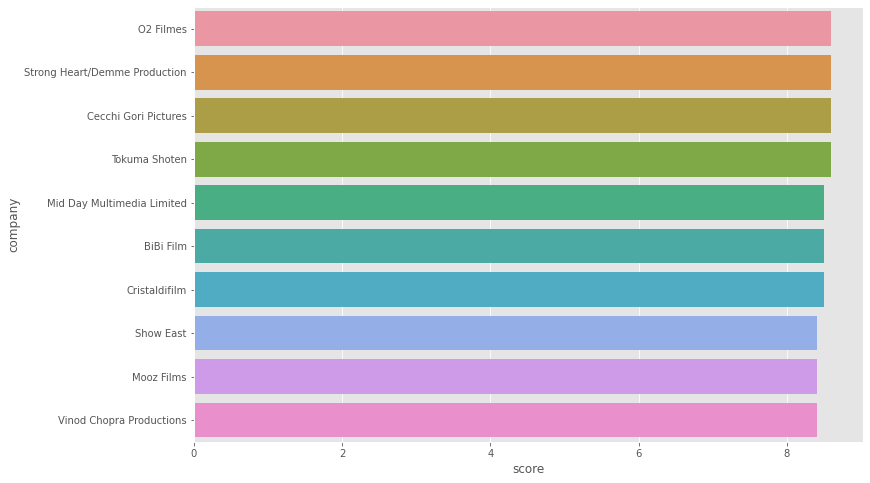

In [102]:
# Plotting top 10 companies with the highest scores

sns.barplot(x=movies.groupby(by='company').mean()['score'].sort_values(ascending=False)[:10], 
            y=movies.groupby(by='company').mean()['score'].sort_values(ascending=False).index[:10], 
            orient='h');

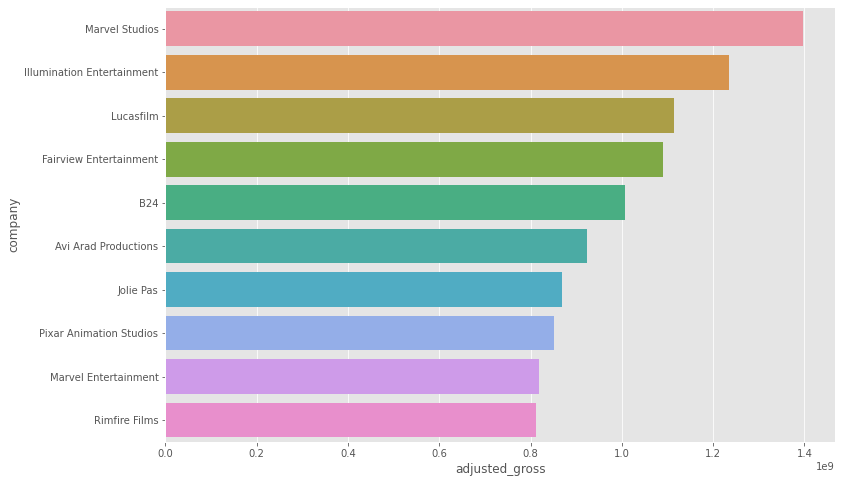

In [103]:
# Plotting companies with the highest gross revenue

sns.barplot(x=movies.groupby(by='company').mean()['adjusted_gross'].sort_values(ascending=False)[:10], 
            y=movies.groupby(by='company').mean()['adjusted_gross'].sort_values(ascending=False).index[:10], 
            orient='h');

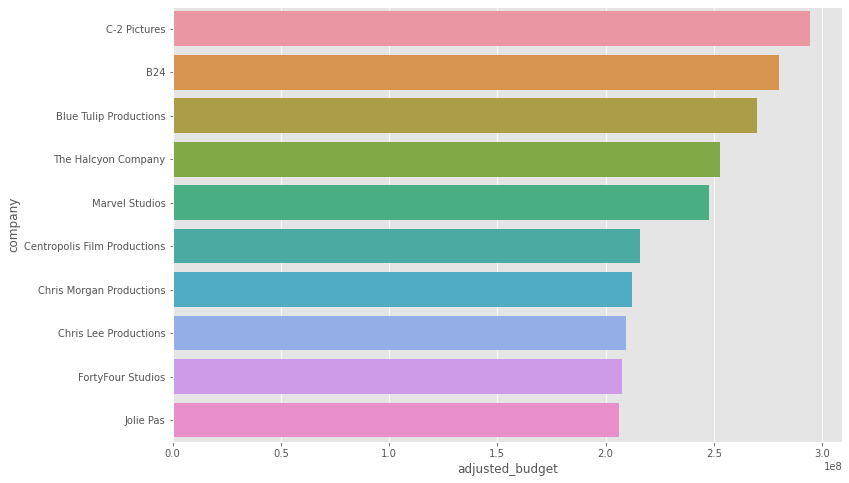

In [104]:
# Are the above top 10 companies with the highest gross also the ones with the highest budget?

sns.barplot(x=movies.groupby(by='company').mean()['adjusted_budget'].sort_values(ascending=False)[:10], 
            y=movies.groupby(by='company').mean()['adjusted_budget'].sort_values(ascending=False).index[:10], 
            orient='h');

Next, let's see which genres do the best.

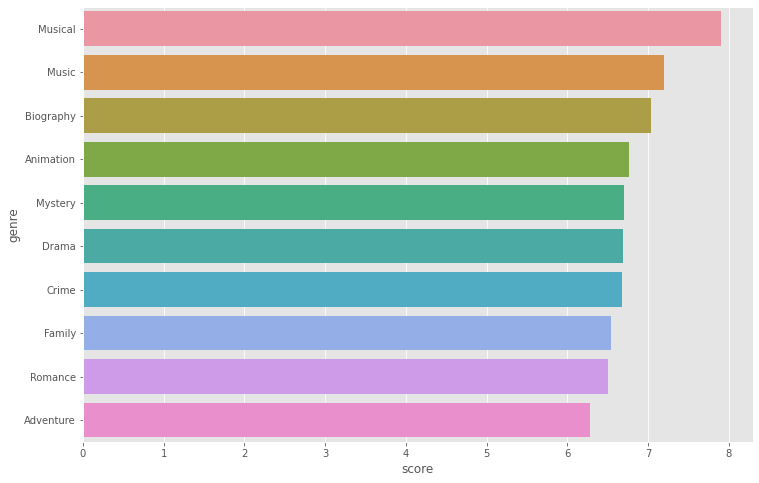

In [105]:
# Plotting top 10 genres with the highest mean score.

sns.barplot(x=movies.groupby(by='genre').mean()['score'].sort_values(ascending=False)[:10], 
            y=movies.groupby(by='genre').mean()['score'].sort_values(ascending=False).index[:10], 
            orient='h');

Let's also take a look at which ratings do the best.

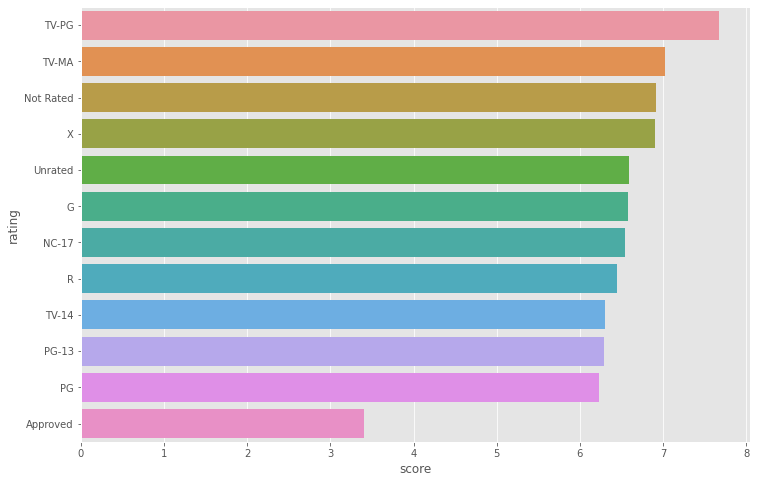

In [106]:
sns.barplot(x=movies.groupby(by='rating').mean()['score'].sort_values(ascending=False), 
            y=movies.groupby(by='rating').mean()['score'].sort_values(ascending=False).index, 
            orient='h');

That concludes our exploration into the movies dataset. We will build a dashboard in Tableau to visualize some of the findings and explore other relationships as well. Let's export our cleaned dataset to an excel file so we can use it in Tableau.

In [107]:
movies.to_excel('cleaned_movies.xlsx')